# Introduction to Cross Validation

In this lecture series we will do a much deeper dive into various methods of cross-validation. As well as a discussion on the general philosphy behind cross validation. A nice official documentation guide can be found here: https://scikit-learn.org/stable/modules/cross_validation.html

## Imports

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Example

In [39]:
df = pd.read_csv("..//Datasets//Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


----
----
----
## Train | Test Split Procedure 

0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Test for both X and y
2. Fit/Train Scaler on Training X Data
3. Scale X Test Data
4. Create Model
5. Fit/Train Model on X Train Data
6. Evaluate Model on X Test Data (by creating predictions and comparing to Y_test)
7. Adjust Parameters as Necessary and repeat steps 5 and 6

In [40]:
# CREATE X and y
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.drop('sales', axis=1)
y = df['sales']

# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

# SCALE DATA
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Create Model**

In [41]:
from sklearn.linear_model import Ridge

# Poor Alpha Choice on purpose!
model = Ridge(alpha=100)
model.fit(X_train, y_train)

Ridge(alpha=100)

In [42]:
y_pred = model.predict(X_test)

**Evaluation**

In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

7.341775789034128

**Adjust Parameters and Re-evaluate**

In [44]:
model = Ridge(alpha=1)
model.fit(X_train, y_train)

Ridge(alpha=1)

**Another Evaluation**

In [45]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

2.3190215794287514

Much better! We could repeat this until satisfied with performance metrics.

----
----
----
## Train | Validation | Test Split Procedure 

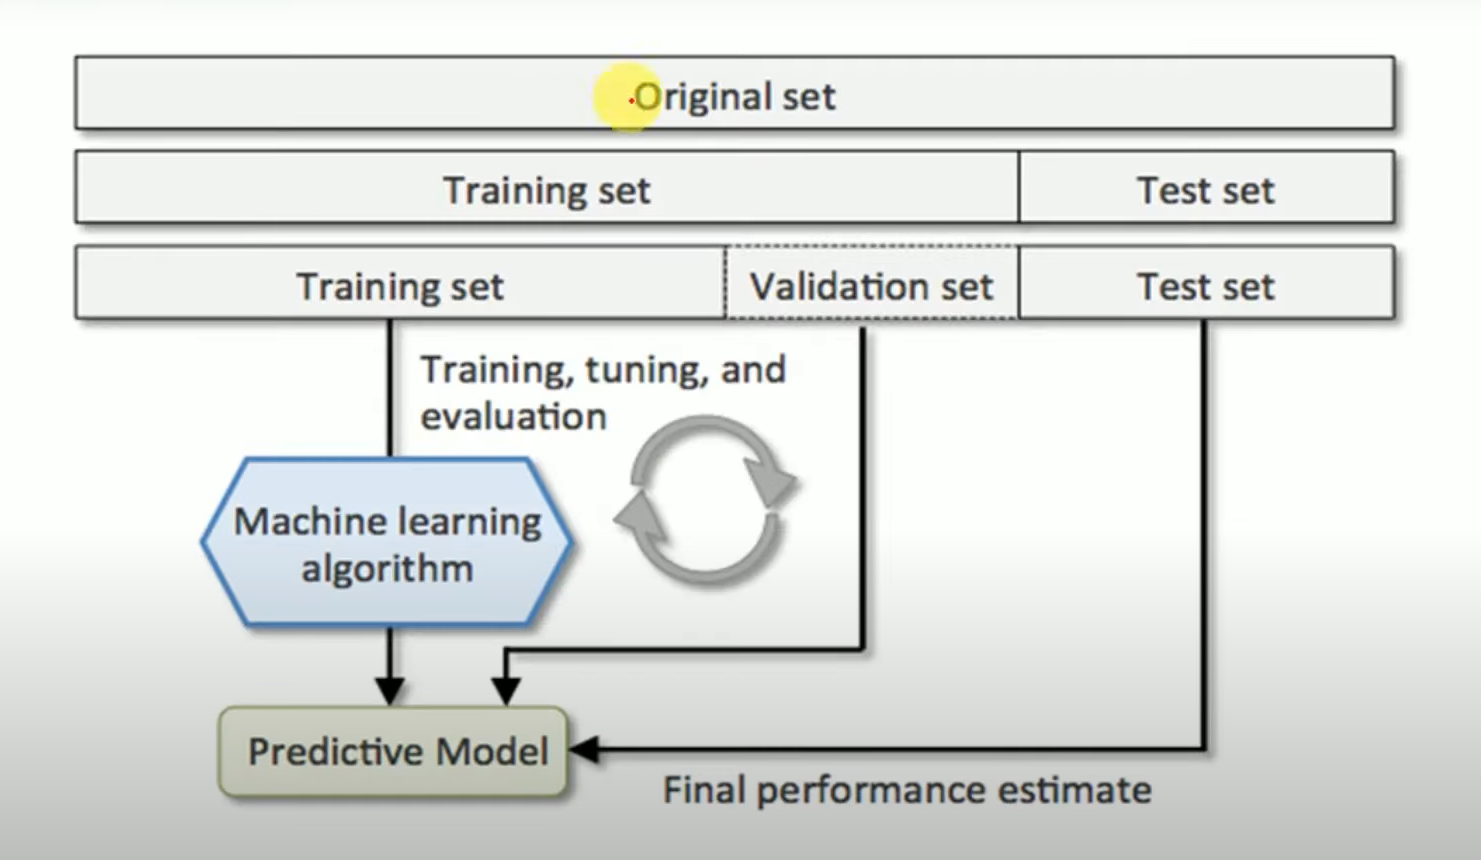

This is often also called a "hold-out" set, since you should not adjust parameters based on the final test set, but instead use it *only* for reporting final expected performance.

0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Validation/Test for both X and y
2. Fit/Train Scaler on Training X Data
3. Scale X Eval Data
4. Create Model
5. Fit/Train Model on X Train Data
6. Evaluate Model on X Evaluation Data (by creating predictions and comparing to Y_eval)
7. Adjust Parameters as Necessary and repeat steps 5 and 6
8. Get final metrics on Test set (not allowed to go back and adjust after this!)

In [46]:
# CREATE X and y
X = df.drop('sales', axis=1)
y = df['sales']

In [47]:
######################################################################
#### SPLIT TWICE! Here we create TRAIN | VALIDATION | TEST  #########
####################################################################
from sklearn.model_selection import train_test_split

# 70% of data is training data, set aside other 30%
X_train, X_OTHER, y_train, y_OTHER = train_test_split(
    X, y, test_size=0.3, random_state=101)

# Remaining 30% is split into evaluation and test sets
# Each is 15% of the original data size
X_eval, X_test, y_eval, y_test = train_test_split(
    X_OTHER, y_OTHER, test_size=0.5, random_state=101)

In [48]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

**Create Model**

In [49]:
from sklearn.linear_model import Ridge

# Poor Alpha Choice on purpose!
model = Ridge(alpha=100)
model.fit(X_train, y_train)

Ridge(alpha=100)

In [50]:
y_eval_pred = model.predict(X_eval)

**Evaluation**

In [51]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_eval, y_eval_pred)

7.320101458823869

**Adjust Parameters and Re-evaluate**

In [52]:
model = Ridge(alpha=1)
model.fit(X_train, y_train)

Ridge(alpha=1)

**Another Evaluation**

In [53]:
y_eval_pred = model.predict(X_eval)
mean_squared_error(y_eval, y_eval_pred)

2.3837830750569853

**Final Evaluation on TEST set (Can no longer edit parameters after this!)**

In [54]:
y_final_test_pred = model.predict(X_test)
mean_squared_error(y_test, y_final_test_pred)

2.254260083800517

----
----
----
## Cross Validation with cross_val_score

----

<img src="grid_search_cross_validation.png">

----

In [55]:
# CREATE X and y
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.drop('sales', axis=1)
y = df['sales']

# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

# SCALE DATA
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
model = Ridge(alpha=100)

In [57]:
from sklearn.model_selection import cross_val_score

# SCORING OPTIONS: https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(model, X_train, y_train,
                         scoring='neg_mean_squared_error', cv=5)

scores

array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
        -8.38562723])

In [58]:
# Average of the MSE scores (we set back to positive)
abs(scores.mean())

8.215396464543607

**Adjust model based on metrics**

In [59]:
model = Ridge(alpha=1)

In [60]:
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(model, X_train, y_train,
                         scoring='neg_mean_squared_error', cv=5)

In [61]:
# Average of the MSE scores (we set back to positive)
abs(scores.mean())

3.344839296530695

**Final Evaluation TEST set (Can no longer edit parameters after this!)**

In [62]:
# Need to fit the model first!
model.fit(X_train, y_train)

Ridge(alpha=1)

In [63]:
y_final_test_pred = model.predict(X_test)

In [64]:
mean_squared_error(y_test, y_final_test_pred)

2.3190215794287514

----
----
----

# Cross Validation with cross_validate

The cross_validate function differs from cross_val_score in two ways:

It allows specifying multiple metrics for evaluation.

It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

For single metric evaluation, where the scoring parameter is a string, callable or None, the keys will be:
        
        - ['test_score', 'fit_time', 'score_time']

And for multiple metric evaluation, the return value is a dict with the following keys:

    ['test_<scorer1_name>', 'test_<scorer2_name>', 'test_<scorer...>', 'fit_time', 'score_time']

return_train_score is set to False by default to save computation time. To evaluate the scores on the training set as well you need to be set to True.

In [65]:
# CREATE X and y
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.drop('sales', axis=1)
y = df['sales']

# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

# SCALE DATA
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
model = Ridge(alpha=100)

In [67]:
from sklearn.model_selection import cross_validate
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_validate(model, X_train, y_train,
                        scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'max_error'], cv=5)

In [68]:
scores

{'fit_time': array([0.009413  , 0.        , 0.        , 0.00776052, 0.        ]),
 'score_time': array([0.00185823, 0.        , 0.        , 0.        , 0.        ]),
 'test_neg_mean_absolute_error': array([-2.31243044, -1.74653361, -2.56211701, -2.01873159, -2.27951906]),
 'test_neg_mean_squared_error': array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
         -8.38562723]),
 'test_max_error': array([ -6.44988486,  -5.58926073, -10.33914027,  -6.61950405,
         -7.75578515])}

In [69]:
pd.DataFrame(scores)

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_max_error
0,0.009413,0.001858,-2.312430,-9.325530,-6.449885
1,0.000000,0.000000,-1.746534,-4.944962,-5.589261
2,0.000000,0.000000,-2.562117,-11.396652,-10.339140
3,0.007761,0.000000,-2.018732,-7.024211,-6.619504
4,0.000000,0.000000,-2.279519,-8.385627,-7.755785


In [70]:
pd.DataFrame(scores).mean()

fit_time                        0.003435
score_time                      0.000372
test_neg_mean_absolute_error   -2.183866
test_neg_mean_squared_error    -8.215396
test_max_error                 -7.350715
dtype: float64

**Adjust model based on metrics**

In [71]:
model = Ridge(alpha=1)

In [72]:
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_validate(model, X_train, y_train,
                        scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'max_error'], cv=5)

pd.DataFrame(scores).mean()

# We can see the errors have been reduced for this model with relevant metric changes.

fit_time                        0.001834
score_time                      0.003013
test_neg_mean_absolute_error   -1.319685
test_neg_mean_squared_error    -3.344839
test_max_error                 -5.161145
dtype: float64

**Final Evaluation (Can no longer edit parameters after this!)**

In [73]:
# Need to fit the model first!
model.fit(X_train, y_train)

Ridge(alpha=1)

In [74]:
y_final_test_pred = model.predict(X_test)
mean_squared_error(y_test, y_final_test_pred)

2.3190215794287514

----
----